# Analysis of historical Premier League clean sheet data

This analysis investigates potential trends in clean sheets kept by Premier League teams over the course of a 38-game season. 

The past four seasons (2014-2015 through 2017-2018) are analyzed for:
- goals scored per week
- goals scored per month
- clean sheets per week

In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pylab
from scipy import stats

In [15]:
# Importing online Premier League data (2015-2018)

data2018 = pd.read_csv("http://www.football-data.co.uk/mmz4281/1718/E0.csv")
data2017 = pd.read_csv("http://www.football-data.co.uk/mmz4281/1617/E0.csv")
data2016 = pd.read_csv("http://www.football-data.co.uk/mmz4281/1516/E0.csv")

In [16]:
# Columns modified to show home and away goals, scored by home and away teams

data2018 = data2018[['HomeTeam','AwayTeam','FTHG','FTAG']]
data2017 = data2017[['HomeTeam','AwayTeam','FTHG','FTAG']]
data2016 = data2016[['HomeTeam','AwayTeam','FTHG','FTAG']]
data2018 = data2018.rename(columns={'FTHG': 'home_goals', 'FTAG': 'away_goals'})
data2017 = data2017.rename(columns={'FTHG': 'home_goals', 'FTAG': 'away_goals'})
data2016 = data2016.rename(columns={'FTHG': 'home_goals', 'FTAG': 'away_goals'})
data2018.head()

,HomeTeam,AwayTeam,home_goals,away_goals
0,Arsenal,Leicester,4,3
1,Brighton,Man City,0,2
2,Chelsea,Burnley,2,3
3,Crystal Palace,Huddersfield,0,3
4,Everton,Stoke,1,0


In [17]:
data2018["gameweek"] = (data2018.index / 10 + 1).astype(int)
num_gameweeks18 = data2018["gameweek"].unique()
print(num_gameweeks18)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38]


In [18]:
# New column for average goals scored per gameweek

data2018["avg_goals"] = (data2018["home_goals"] + data2018["away_goals"]) / 2
avg_goals_per_gwk18 = data2018["avg_goals"].groupby(np.arange(len(data2018["avg_goals"]))//10).mean()
data2018.head()
print(avg_goals_per_gwk18)

0     1.55
1     1.10
2     1.00
3     1.40
4     1.05
5     1.45
6     1.10
7     1.40
8     1.75
9     1.15
10    1.20
11    1.60
12    1.10
13    1.60
14    1.35
15    1.35
16    1.05
17    1.45
18    1.55
19    1.75
20    1.00
21    1.35
22    1.55
23    1.25
24    1.20
25    1.75
26    1.35
27    1.45
28    1.20
29    1.45
30    1.45
31    1.50
32    1.55
33    1.05
34    1.20
35    1.15
36    0.95
37    1.55
Name: avg_goals, dtype: float64


(0.8, 1.8)

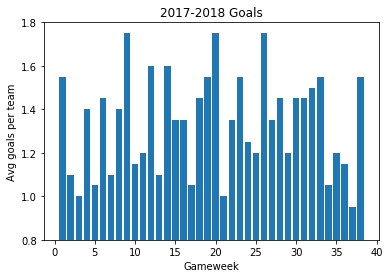

In [19]:
# Plot showing goals scored (per team) each gameweek last season (2017-2018)

plt.bar(num_gameweeks18, avg_goals_per_gwk18)
plt.title("2017-2018 Goals")
plt.xlabel('Gameweek')
plt.ylabel('Avg goals per team')
plt.gca().set_ylim([0.8,1.8])

y=0.000810x+(1.323684)


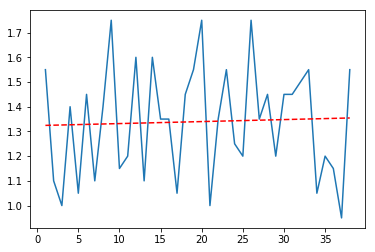

In [20]:
# Linear trend of goals per gameweek
pylab.plot(num_gameweeks18, avg_goals_per_gwk18)

# calc the trendline
z = np.polyfit(num_gameweeks18, avg_goals_per_gwk18, 1)
p = np.poly1d(z)
pylab.plot(num_gameweeks18,p(num_gameweeks18),"r--")
# the line equation:
print("y=%.6fx+(%.6f)"%(z[0],z[1]))

In [21]:
# Repeat of analysis for 2016-2017 season

data2017["gameweek"] = (data2017.index / 10 + 1).astype(int)
num_gameweeks17 = data2017["gameweek"].unique()
data2017["avg_goals"] = (data2017["home_goals"] + data2017["away_goals"]) / 2
avg_goals_per_gwk17 = data2017["avg_goals"].groupby(np.arange(len(data2017["avg_goals"]))//10).mean()

In [22]:
# Repeat of analysis for 2015-2016 season

data2016["gameweek"] = (data2016.index / 10 + 1).astype(int)
num_gameweeks16 = data2016["gameweek"].unique()
data2016["avg_goals"] = (data2016["home_goals"] + data2016["away_goals"]) / 2
avg_goals_per_gwk16 = data2016["avg_goals"].groupby(np.arange(len(data2016["avg_goals"]))//10).mean()

(0.8, 1.8)

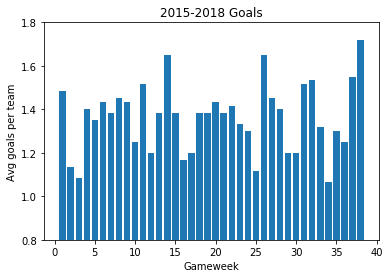

In [23]:
# Plot showing goals scored per team each gameweek for the last 3 seasons

avg_goals_per_gwk = (avg_goals_per_gwk18 + avg_goals_per_gwk17 + avg_goals_per_gwk16) / 3
plt.bar(num_gameweeks18, avg_goals_per_gwk)
plt.title("2015-2018 Goals")
plt.xlabel('Gameweek')
plt.ylabel('Avg goals per team')
plt.gca().set_ylim([0.8,1.8])

y=0.002x+(1.332)
regression: LinregressResult(slope=0.0015975489659700154, intercept=1.3320056899004271, rvalue=0.11292472126749119, pvalue=0.4996597963903203, stderr=0.0023427558646222715)


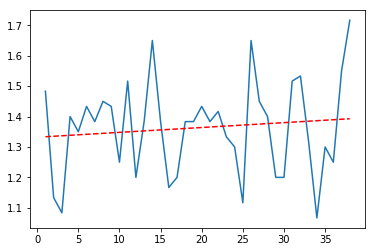

In [24]:
# Trendline of linear model for goals scored per team teach gameweek for the last 3 seasons

x = num_gameweeks18
y = avg_goals_per_gwk

pylab.plot(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pylab.plot(x,p(x),"r--")
r_value = stats.linregress(x, y)
# the line equation:
print("y=%.3fx+(%.3f)"%(z[0],z[1]))
print("regression:", r_value)

In [25]:
# Creating bins to split data into 4-week segments
# There are 38 weeks so final 2 weeks form their own bin

bins = [0, 4, 8, 12, 16, 20, 24, 28, 32, 36]
binned_goalsperwk = [avg_goals_per_gwk[i:(i+3)].mean() for  i in bins]
print(binned_goalsperwk)

[1.2333333333333334, 1.388888888888889, 1.4000000000000001, 1.4722222222222223, 1.3222222222222222, 1.377777777777778, 1.4055555555555557, 1.3055555555555556, 1.2277777777777776, 1.6333333333333333]


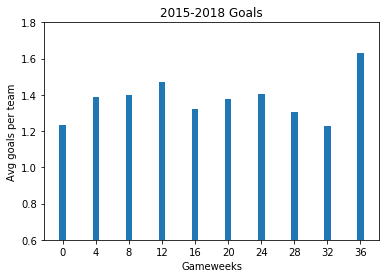

In [26]:
plt.bar(bins, binned_goalsperwk)

plt.title("2015-2018 Goals")
plt.xlabel('Gameweeks')
plt.ylabel('Avg goals per team')
plt.xticks(np.arange(0, 40, 4))
plt.gca().set_ylim([0.6,1.8])
binlabels = [0, 4, 8, 12, 16, 20, 24, 28, 32, 36]

Text(0,0.5,'Clean sheets per week')

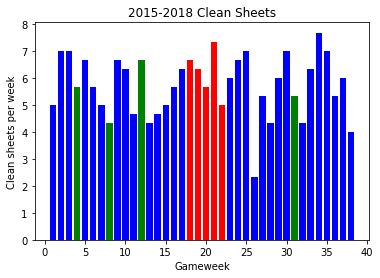

In [27]:
# New column for clean sheets, created for each of the last 3 seasons

data2018_goals = data2018.loc[:, ["home_goals", "away_goals"]]
data2018["clean_sheets"] = (data2018_goals == 0).astype(int).sum(axis=1)

data2017_goals = data2017.loc[:, ["home_goals", "away_goals"]]
data2017["clean_sheets"] = (data2017_goals == 0).astype(int).sum(axis=1)

data2016_goals = data2016.loc[:, ["home_goals", "away_goals"]]
data2016["clean_sheets"] = (data2016_goals == 0).astype(int).sum(axis=1)

# Grouping clean sheet data from all three seasons

cs_per_gwk18 = data2018["clean_sheets"].groupby(np.arange(len(data2018["clean_sheets"]))//10).sum()
cs_per_gwk17 = data2017["clean_sheets"].groupby(np.arange(len(data2017["clean_sheets"]))//10).sum()
cs_per_gwk16 = data2016["clean_sheets"].groupby(np.arange(len(data2016["clean_sheets"]))//10).sum()
average_cs_per_wk = (cs_per_gwk18 + cs_per_gwk17 + cs_per_gwk16) / 3

# Colour coding key weeks in plotted clean sheet data for the past 3 years

cs_plot_1 = plt.bar(num_gameweeks18[:17], average_cs_per_wk[:17], color = 'b')
cs_plot_christmas = plt.bar(num_gameweeks18[17:22], average_cs_per_wk[17:22], color = 'r')
cs_plot_2 = plt.bar(num_gameweeks18[22:38], average_cs_per_wk[22:38], color = 'b')
cs_plot_h1 = plt.bar(num_gameweeks18[3], average_cs_per_wk[3], color = 'g')
cs_plot_h2 = plt.bar(num_gameweeks18[7], average_cs_per_wk[7], color = 'g')
cs_plot_h3 = plt.bar(num_gameweeks18[11], average_cs_per_wk[11], color = 'g')
cs_plot_h4 = plt.bar(num_gameweeks18[30], average_cs_per_wk[30], color = 'g')

plt.title("2015-2018 Clean Sheets")
plt.xlabel('Gameweek')
plt.ylabel('Clean sheets per week')

Text(0,0.5,'Average number of clean sheets per week')

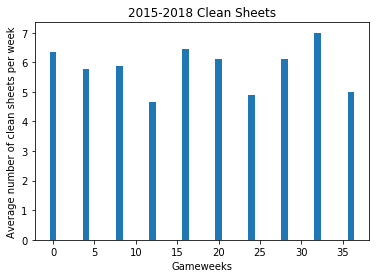

In [28]:
# Binning clean sheet data into 4-week bins


bins = [0, 4, 8, 12, 16, 20, 24, 28, 32, 36]
binned_csperwk = [average_cs_per_wk[i:(i+3)].mean() for  i in bins]

plt.bar(bins, binned_csperwk)
plt.title("2015-2018 Clean Sheets")
plt.xlabel("Gameweeks")
plt.ylabel("Average number of clean sheets per week")